In [2]:
import pandas as pd

In [3]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

import seaborn as sns
from sklearn.metrics import mean_squared_error

In [12]:
!pip install scikit-learn

In [2]:
!pip install pyarrow

     |████████████████████████████████| 40.8 MB 33.9 MB/s eta 0:00:01     |████████████████████████████▉   | 36.7 MB 33.9 MB/s eta 0:00:01


In [6]:
def read_preprocess_data(filename):
    df = pd.read_parquet(filename)
    duration = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    duration_minutes = duration.dt.total_seconds().div(60).astype(int) 
    df['duration'] = duration_minutes

    df = df[(df.duration >= 1) & (df.duration <= 60 )]
    
    
    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [7]:
df_train = read_preprocess_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [8]:
df_val = read_preprocess_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [9]:
len(df_train), len(df_val)

(3011044, 2858178)

In [11]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [ ]:
def train_model():
    train_dicts = Jan2023[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer()
    X_train = dv.fit_transform(train_dicts) 
    
    target = 'duration'
    y_train = Jan2023[target].values
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_train)
    
    error = mean_squared_error(y_train, y_pred, squared = False)
    
    return 

In [12]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [13]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

X_val = dv.transform(val_dicts)

In [14]:
X_train, X_val

(<3011044x516 sparse matrix of type '<class 'numpy.float64'>'
 	with 9033132 stored elements in Compressed Sparse Row format>,
 <2858178x516 sparse matrix of type '<class 'numpy.float64'>'
 	with 8574526 stored elements in Compressed Sparse Row format>)

In [15]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [16]:
y_train, y_val

(array([ 8,  6, 12, ..., 24, 13, 14]), array([ 1, 32, 13, ..., 14,  7,  9]))

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.fit(X_val, y_val)


LinearRegression()

In [20]:
y_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

In [21]:
y_pred, y_val_pred

(array([11.34343551, 10.47200319, 11.10506631, ..., 11.65585006,
        12.40985299, 11.24073691]),
 array([11.04277357, 49.49726609, 15.23427411, ..., 13.59518542,
        10.77505757, 12.92165239]))

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

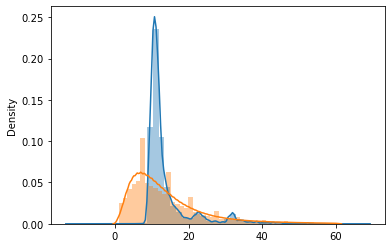

In [72]:
sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')

In [22]:
mean_squared_error(y_train, y_pred, squared = False)

7.72761075946607

In [23]:
mean_squared_error(y_val, y_val_pred, squared = False)

7.82181434580261